In [13]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('data/heart.csv')

In [3]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [4]:
def trestbps_mean(age, sex):
    table = (
        (range(21), 123, 116),
        (range(21, 31), 126, 120),
        (range(31, 41), 129, 127),
        (range(41, 51), 135, 137),
        (range(51, 61), 142, 144),
        (range(61, 300), 142, 159)
    )
    for i in table:
        if age in i[0]:
            if sex == 1: return i[1]
            else: return i[2]

In [5]:
heart['trestbps_mean'] = heart.apply(
    lambda feat: trestbps_mean(feat['age'], feat['sex']),
    axis=1
    )

In [ ]:
feats = ('cp', 'restecg', 'slope', 'ca', 'thal')

for i in feats:
    bin_enc = ce.OneHotEncoder(cols=[i])
    feature = bin_enc.fit_transform(heart[i])
    heart = pd.concat([heart, feature], axis=1)

In [7]:
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)

In [12]:
heart.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

<Axes: >

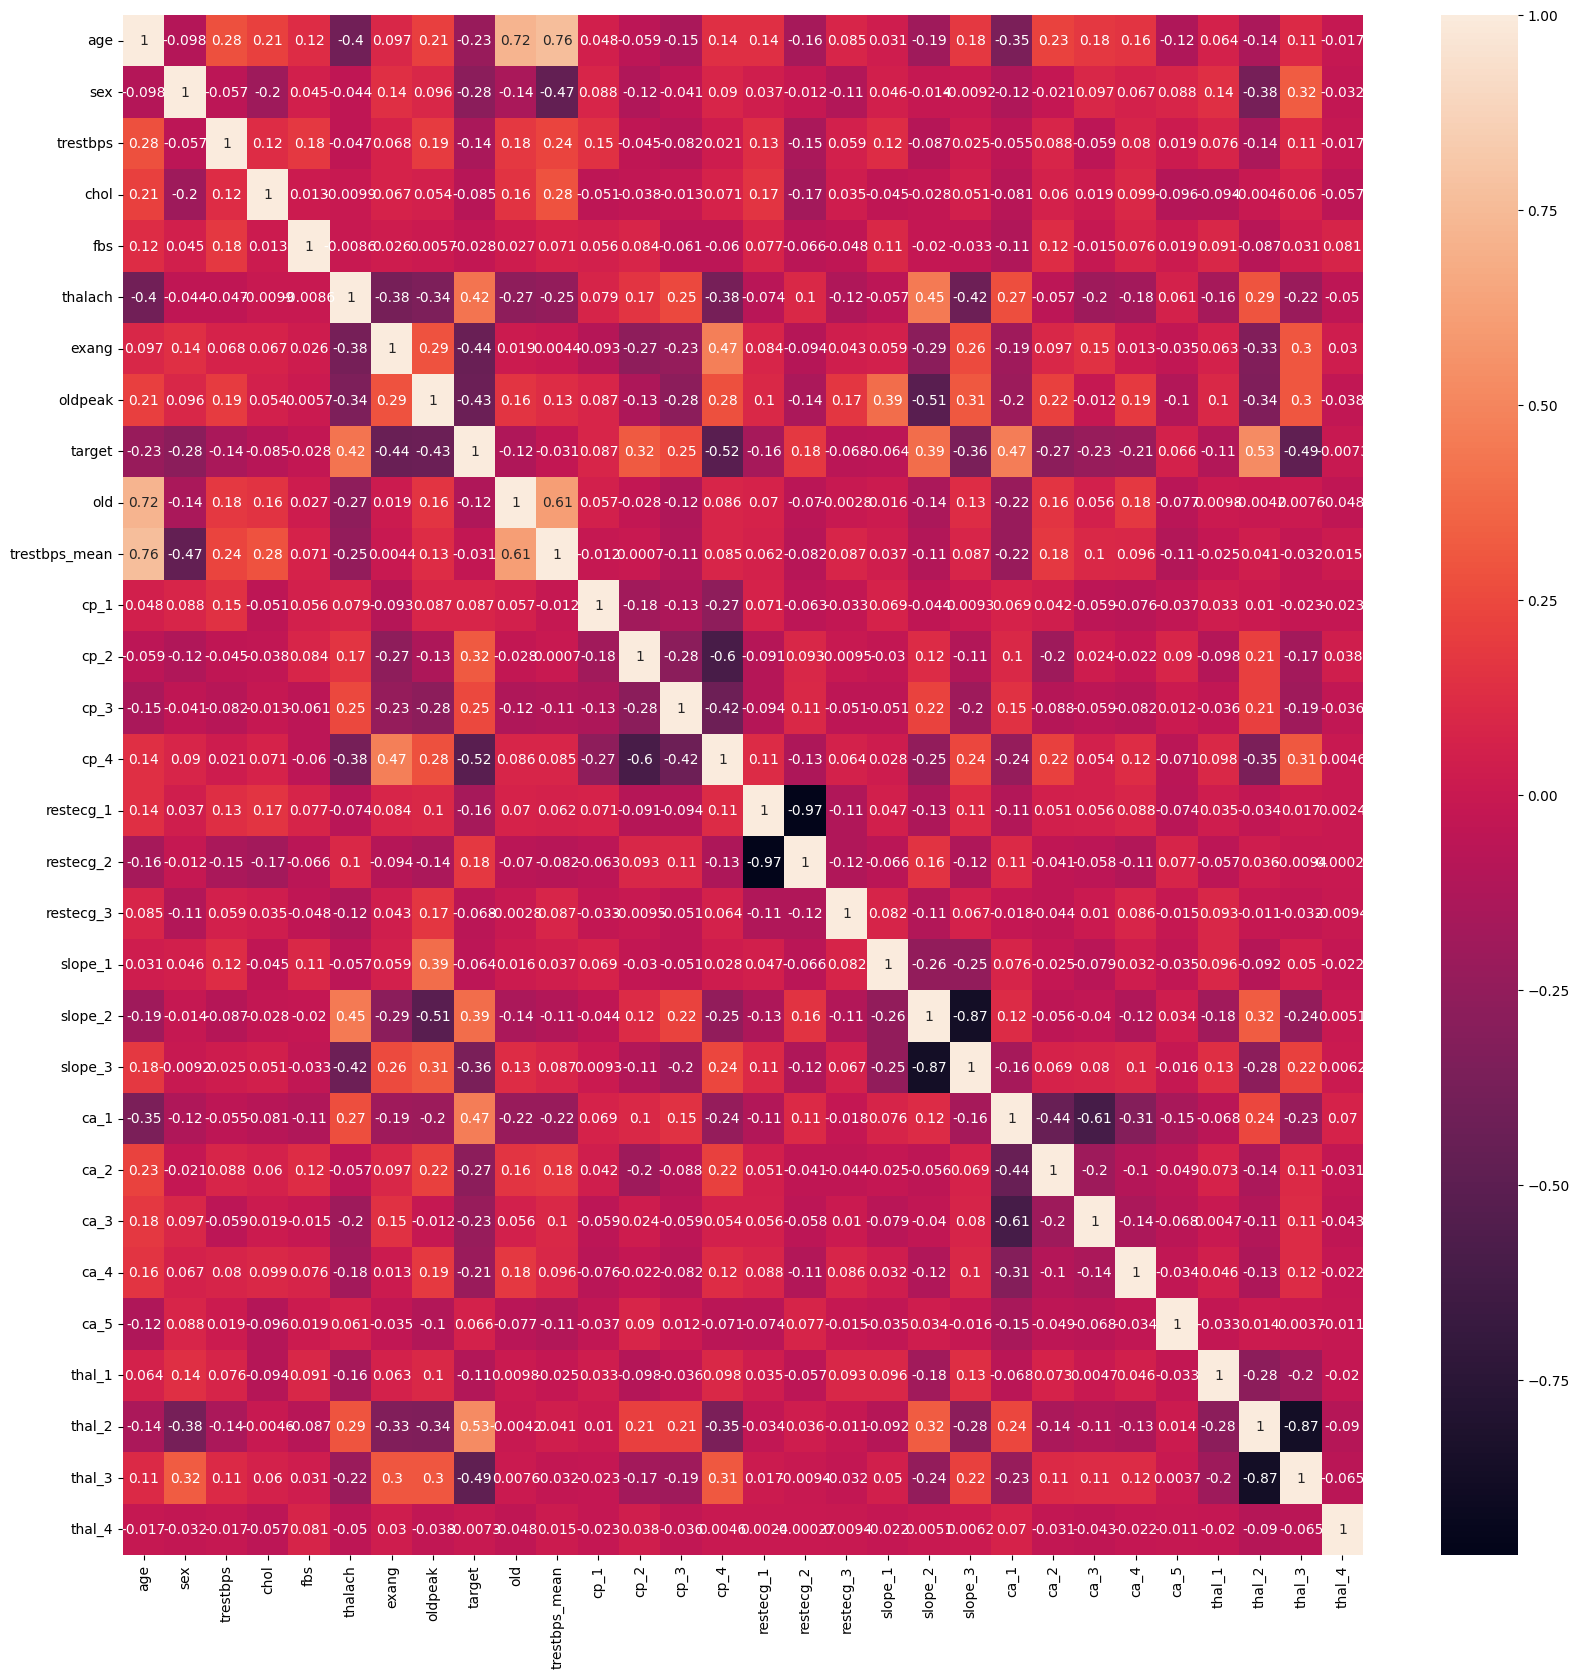

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heart_r.corr(), annot=True, ax=ax)

In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [26]:
get_top_abs_correlations(heart_r, 10)

restecg_1  restecg_2        0.973934
thal_2     thal_3           0.873032
slope_2    slope_3          0.870365
age        trestbps_mean    0.763055
           old              0.718028
old        trestbps_mean    0.611538
ca_1       ca_3             0.611058
cp_2       cp_4             0.599986
target     thal_2           0.527334
           cp_4             0.516015
dtype: float64